<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [147]:
!pip install pandas

In [148]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [149]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-10 16:16:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  43.3MB/s    in 4.0s    

2025-01-10 16:16:24 (37.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [150]:
# disply all the column names
all_columns = df.columns.tolist()
for column in all_columns:
    print(column)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [151]:
# Get a summary of the dataset
df.info()

# Get descriptive statistics for numerical columns
df.describe()

# Get descriptive statistics for categorical columns
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,...,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,...,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
freq,50207,23911,39041,23015,65437,9993,24942,3674,603,6947,...,14426,10951,9341,2364,2834,13230,15813,11918,38767,30071


In [152]:
# Display all the column names and their data types
columns_types = df.dtypes
for column, dtype in columns_types.items():
    print(f"{column}: {dtype}")

ResponseId: int64
MainBranch: object
Age: object
Employment: object
RemoteWork: object
Check: object
CodingActivities: object
EdLevel: object
LearnCode: object
LearnCodeOnline: object
TechDoc: object
YearsCode: object
YearsCodePro: object
DevType: object
OrgSize: object
PurchaseInfluence: object
BuyNewTool: object
BuildvsBuy: object
TechEndorse: object
Country: object
Currency: object
CompTotal: float64
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object
DatabaseHaveWorkedWith: object
DatabaseWantToWorkWith: object
DatabaseAdmired: object
PlatformHaveWorkedWith: object
PlatformWantToWorkWith: object
PlatformAdmired: object
WebframeHaveWorkedWith: object
WebframeWantToWorkWith: object
WebframeAdmired: object
EmbeddedHaveWorkedWith: object
EmbeddedWantToWorkWith: object
EmbeddedAdmired: object
MiscTechHaveWorkedWith: object
MiscTechWantToWorkWith: object
MiscTechAdmired: object
ToolsTechHaveWorkedWith: object
ToolsTechWantToWorkWith: object
ToolsTechAdmi

In [153]:
# List of JobSatPoints columns
job_sat_columns = ['JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly']

# Fill missing values in the 'Age' column with the mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

# Fill missing values in JobSatPoints columns with median
for col in job_sat_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Verify that missing values are handled in JobSatPoints columns
print("\nMissing values after filling JobSatPoints columns:")
for col in job_sat_columns:
    if col in df.columns:
        print(f"{col}: {df[col].isna().sum()}")



Missing values after filling JobSatPoints columns:
JobSatPoints_1: 0
JobSatPoints_4: 0
JobSatPoints_5: 0
JobSatPoints_6: 0
JobSatPoints_7: 0
JobSatPoints_8: 0
JobSatPoints_9: 0
JobSatPoints_10: 0
JobSatPoints_11: 0
ConvertedCompYearly: 0


<ipython-input-153-a3b790f90db8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
<ipython-input-153-a3b790f90db8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [154]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
for column, count in missing_values.items():
    print(f"{column}: {count}")

# Handle missing values (example: dropping columns or rows with many missing values)
# Here we will drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)


Missing values in each column:
ResponseId: 0
MainBranch: 0
Age: 0
Employment: 0
RemoteWork: 10631
Check: 0
CodingActivities: 10971
EdLevel: 4653
LearnCode: 4949
LearnCodeOnline: 16200
TechDoc: 24540
YearsCode: 5568
YearsCodePro: 13827
DevType: 5992
OrgSize: 17957
PurchaseInfluence: 18031
BuyNewTool: 20256
BuildvsBuy: 22079
TechEndorse: 21769
Country: 6507
Currency: 18753
CompTotal: 31697
LanguageHaveWorkedWith: 5692
LanguageWantToWorkWith: 9685
LanguageAdmired: 14565
DatabaseHaveWorkedWith: 15183
DatabaseWantToWorkWith: 22879
DatabaseAdmired: 26880
PlatformHaveWorkedWith: 23071
PlatformWantToWorkWith: 30905
PlatformAdmired: 34060
WebframeHaveWorkedWith: 20276
WebframeWantToWorkWith: 26902
WebframeAdmired: 30494
EmbeddedHaveWorkedWith: 43223
EmbeddedWantToWorkWith: 47837
EmbeddedAdmired: 48704
MiscTechHaveWorkedWith: 25994
MiscTechWantToWorkWith: 32473
MiscTechAdmired: 35841
ToolsTechHaveWorkedWith: 12955
ToolsTechWantToWorkWith: 19353
ToolsTechAdmired: 21440
NEWCollabToolsHaveWorkedWit

In [155]:
# Check for missing values
data_aftermissing_values = df_cleaned.isnull().sum()
print("Missing values in each column:")
for column, count in data_aftermissing_values.items():
    print(f"{column}: {count}")

Missing values in each column:
ResponseId: 0
MainBranch: 0
Age: 0
Employment: 0
RemoteWork: 10631
Check: 0
CodingActivities: 10971
EdLevel: 4653
LearnCode: 4949
LearnCodeOnline: 16200
TechDoc: 24540
YearsCode: 5568
YearsCodePro: 13827
DevType: 5992
OrgSize: 17957
PurchaseInfluence: 18031
BuyNewTool: 20256
BuildvsBuy: 22079
TechEndorse: 21769
Country: 6507
Currency: 18753
CompTotal: 31697
LanguageHaveWorkedWith: 5692
LanguageWantToWorkWith: 9685
LanguageAdmired: 14565
DatabaseHaveWorkedWith: 15183
DatabaseWantToWorkWith: 22879
DatabaseAdmired: 26880
PlatformHaveWorkedWith: 23071
PlatformWantToWorkWith: 30905
WebframeHaveWorkedWith: 20276
WebframeWantToWorkWith: 26902
WebframeAdmired: 30494
MiscTechHaveWorkedWith: 25994
MiscTechWantToWorkWith: 32473
ToolsTechHaveWorkedWith: 12955
ToolsTechWantToWorkWith: 19353
ToolsTechAdmired: 21440
NEWCollabToolsHaveWorkedWith: 7845
NEWCollabToolsWantToWorkWith: 13350
NEWCollabToolsAdmired: 14726
OpSysPersonal use: 7263
OpSysProfessional use: 12464
Off

In [156]:
# Dropping rows with missing values in critical columns
columns_to_check = ['YearsCodePro', 'CompTotal',  'MainBranch', 'Age', 'Employment']  # Removed 'JobSat', 'WorkExp'

# Drop rows with missing values in the specified columns only if they are present in the DataFrame
columns_to_check = [col for col in columns_to_check if col in df_cleaned.columns]
df_cleaned.dropna(subset=columns_to_check, inplace=True)

# Verify that missing values are handled in these columns
print("\nMissing values after dropping rows:")
for column in columns_to_check:
    print(f"{column}: {df_cleaned[column].isna().sum()}")


Missing values after dropping rows:
YearsCodePro: 0
CompTotal: 0
MainBranch: 0
Age: 0
Employment: 0


<ipython-input-156-f4dde4d67b6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=columns_to_check, inplace=True)


In [157]:
# List of numeric columns to fill missing values
numeric_columns = ['ConvertedCompYearly', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']

# Fill missing values in numeric columns with median
for col in numeric_columns:
    if col in df_cleaned.columns:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Verify that missing values are handled in numeric columns
print("\nMissing values after filling numeric columns:")
for col in numeric_columns:
    if col in df_cleaned.columns:
        print(f"{col}: {df_cleaned[col].isna().sum()}")



Missing values after filling numeric columns:
ConvertedCompYearly: 0
JobSatPoints_1: 0
JobSatPoints_4: 0
JobSatPoints_5: 0
JobSatPoints_6: 0
JobSatPoints_7: 0
JobSatPoints_8: 0
JobSatPoints_9: 0
JobSatPoints_10: 0
JobSatPoints_11: 0


<ipython-input-157-7622bab2268c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-157-7622bab2268c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [158]:
# List of categorical columns to fill missing values
categorical_columns = ['RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'SurveyLength', 'SurveyEase']

# Fill missing values in categorical columns with mode
for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Verify that missing values are handled in categorical columns
print("\nMissing values after filling categorical columns:")
for col in categorical_columns:
    if col in df_cleaned.columns:
        print(f"{col}: {df_cleaned[col].isna().sum()}")


<ipython-input-158-9485b740eaaa>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
<ipython-input-158-9485b740eaaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)



Missing values after filling categorical columns:
RemoteWork: 0
CodingActivities: 0
EdLevel: 0
LearnCode: 0
LearnCodeOnline: 0
TechDoc: 0
DevType: 0
OrgSize: 0
PurchaseInfluence: 0
BuyNewTool: 0
BuildvsBuy: 0
TechEndorse: 0
Country: 0
Currency: 0
LanguageHaveWorkedWith: 0
LanguageWantToWorkWith: 0
LanguageAdmired: 0
DatabaseHaveWorkedWith: 0
PlatformHaveWorkedWith: 0
WebframeHaveWorkedWith: 0
MiscTechHaveWorkedWith: 0
ToolsTechHaveWorkedWith: 0
NEWCollabToolsHaveWorkedWith: 0
NEWCollabToolsWantToWorkWith: 0
NEWCollabToolsAdmired: 0
OpSysPersonal use: 0
OpSysProfessional use: 0
OfficeStackAsyncHaveWorkedWith: 0
OfficeStackAsyncWantToWorkWith: 0
OfficeStackAsyncAdmired: 0
OfficeStackSyncHaveWorkedWith: 0
OfficeStackSyncWantToWorkWith: 0
OfficeStackSyncAdmired: 0
AISearchDevHaveWorkedWith: 0
NEWSOSites: 0
SOVisitFreq: 0
SOAccount: 0
SOPartFreq: 0
SOHow: 0
SOComm: 0
AISelect: 0
AISent: 0
AIBen: 0
AIAcc: 0
AIComplex: 0
SurveyLength: 0
SurveyEase: 0


In [159]:
# Verify data types after conversion
columns_types = df_cleaned.dtypes
for column, dtype in columns_types.items():
    print(f"{column}: {dtype}")

ResponseId: int64
MainBranch: object
Age: object
Employment: object
RemoteWork: object
Check: object
CodingActivities: object
EdLevel: object
LearnCode: object
LearnCodeOnline: object
TechDoc: object
YearsCode: object
YearsCodePro: object
DevType: object
OrgSize: object
PurchaseInfluence: object
BuyNewTool: object
BuildvsBuy: object
TechEndorse: object
Country: object
Currency: object
CompTotal: float64
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object
DatabaseHaveWorkedWith: object
DatabaseWantToWorkWith: object
DatabaseAdmired: object
PlatformHaveWorkedWith: object
PlatformWantToWorkWith: object
WebframeHaveWorkedWith: object
WebframeWantToWorkWith: object
WebframeAdmired: object
MiscTechHaveWorkedWith: object
MiscTechWantToWorkWith: object
ToolsTechHaveWorkedWith: object
ToolsTechWantToWorkWith: object
ToolsTechAdmired: object
NEWCollabToolsHaveWorkedWith: object
NEWCollabToolsWantToWorkWith: object
NEWCollabToolsAdmired: object
OpSysPersonal use:

In [160]:
# Convert 'YearsCodePro' to numeric again
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Verify data types after conversion
print("\nData types after conversion:")
# Display all the column names and their data types
columns_types = df_cleaned.dtypes
for column, dtype in columns_types.items():
    print(f"{column}: {dtype}")


Data types after conversion:
ResponseId: int64
MainBranch: object
Age: object
Employment: object
RemoteWork: object
Check: object
CodingActivities: object
EdLevel: object
LearnCode: object
LearnCodeOnline: object
TechDoc: object
YearsCode: object
YearsCodePro: float64
DevType: object
OrgSize: object
PurchaseInfluence: object
BuyNewTool: object
BuildvsBuy: object
TechEndorse: object
Country: object
Currency: object
CompTotal: float64
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object
DatabaseHaveWorkedWith: object
DatabaseWantToWorkWith: object
DatabaseAdmired: object
PlatformHaveWorkedWith: object
PlatformWantToWorkWith: object
WebframeHaveWorkedWith: object
WebframeWantToWorkWith: object
WebframeAdmired: object
MiscTechHaveWorkedWith: object
MiscTechWantToWorkWith: object
ToolsTechHaveWorkedWith: object
ToolsTechWantToWorkWith: object
ToolsTechAdmired: object
NEWCollabToolsHaveWorkedWith: object
NEWCollabToolsWantToWorkWith: object
NEWCollabToolsAdm

<ipython-input-160-18ef7efc9777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')


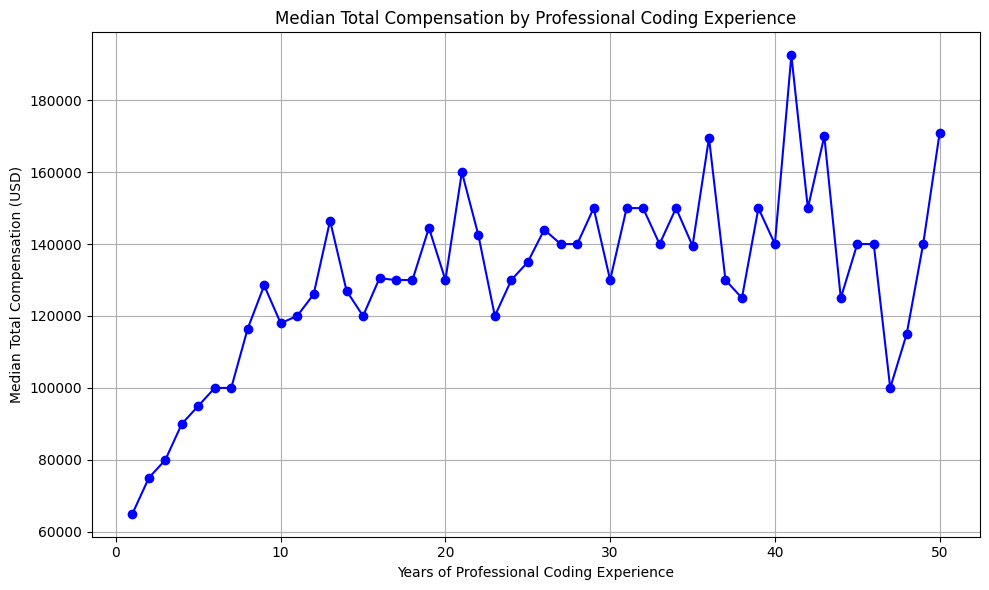

In [161]:
# Calculate the median compensation for each experience level
median_compensation = df_cleaned.groupby('YearsCodePro')['CompTotal'].median().reset_index()

# Plot the line chart to visualize the trends in compensation by experience level
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['YearsCodePro'], median_compensation['CompTotal'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Total Compensation (USD)')
plt.title('Median Total Compensation by Professional Coding Experience')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


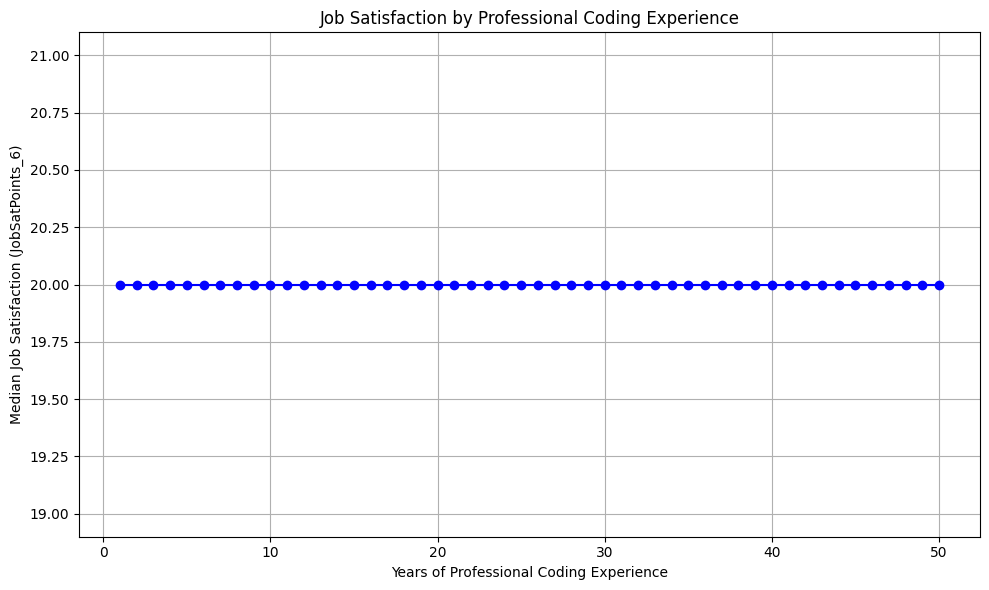

In [162]:
# Calculate the median job satisfaction for each experience level
median_job_satisfaction = df_cleaned.groupby('YearsCodePro')['JobSatPoints_6'].median().reset_index()

# Plot the line chart to visualize the trends in job satisfaction by experience level
plt.figure(figsize=(10, 6))
plt.plot(median_job_satisfaction['YearsCodePro'], median_job_satisfaction['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Job Satisfaction by Professional Coding Experience')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



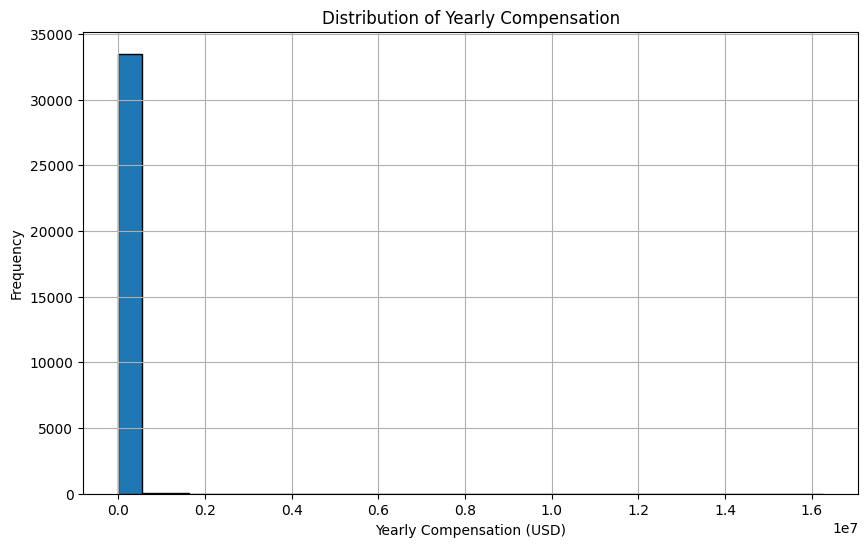

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ConvertedCompYearly'], bins=30, edgecolor='black')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation')
plt.grid(True)
plt.show()

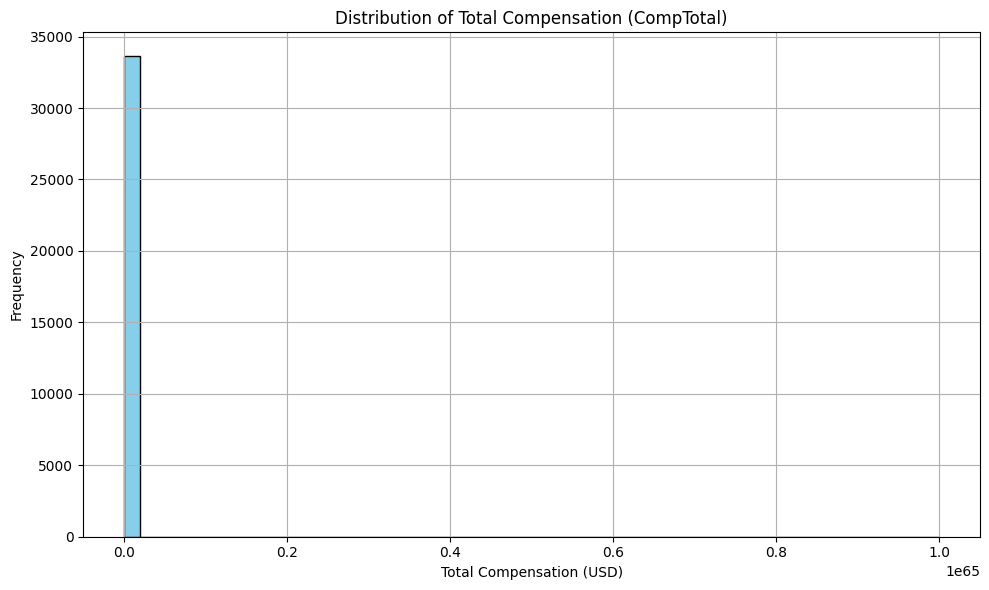

In [164]:
# Create the histogram for 'CompTotal'
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['CompTotal'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



<ipython-input-165-006f6c105655>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


72       18-24 years old
374      25-34 years old
379      35-44 years old
385      35-44 years old
389      25-34 years old
              ...       
65396    18-24 years old
65401    25-34 years old
65408    25-34 years old
65412    35-44 years old
65431    45-54 years old
Name: Age, Length: 33617, dtype: object
72       2
374      3
379      4
385      4
389      3
        ..
65396    2
65401    3
65408    3
65412    4
65431    5
Name: AgeNumeric, Length: 33617, dtype: int64


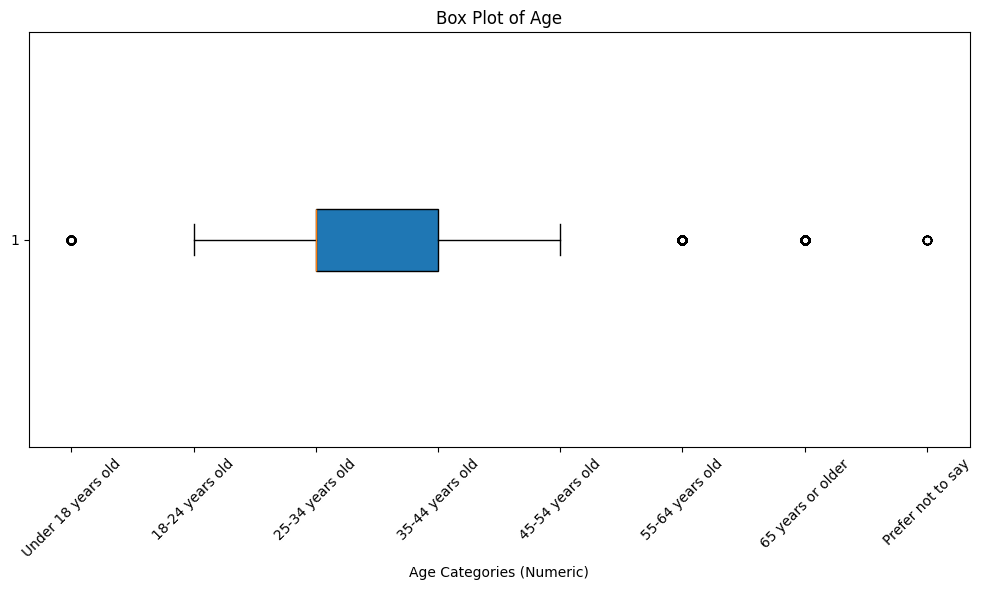

In [165]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

print(df_cleaned['Age'])
print(df_cleaned['AgeNumeric'])

# Create the box plot for 'AgeNumeric'
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['AgeNumeric'].dropna(), vert=False, patch_artist=True)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.title('Box Plot of Age')

# Customizing the x-axis with category labels
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



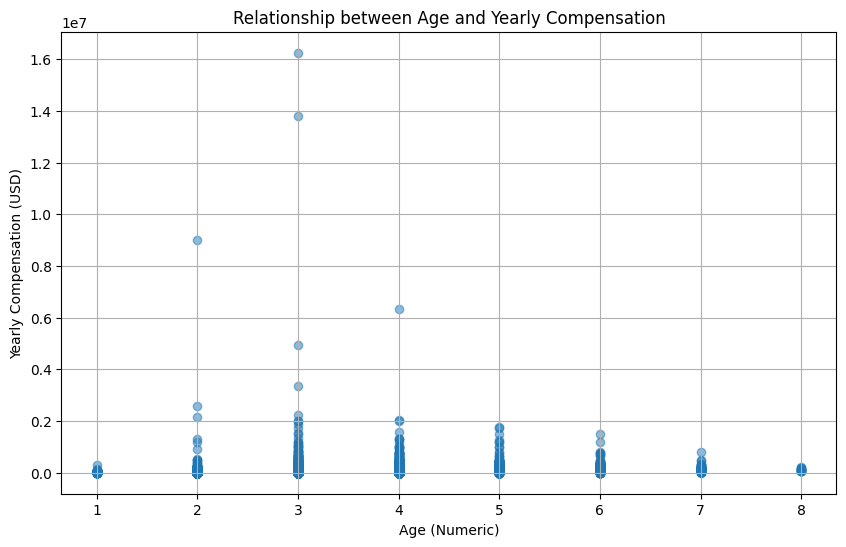

In [166]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeNumeric'], df_cleaned['ConvertedCompYearly'], alpha=0.5)  # Use alpha for better visualization

# Add labels and title
plt.xlabel('Age (Numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Relationship between Age and Yearly Compensation')
plt.grid(True)
plt.show()

<ipython-input-167-8fce2c78cffd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


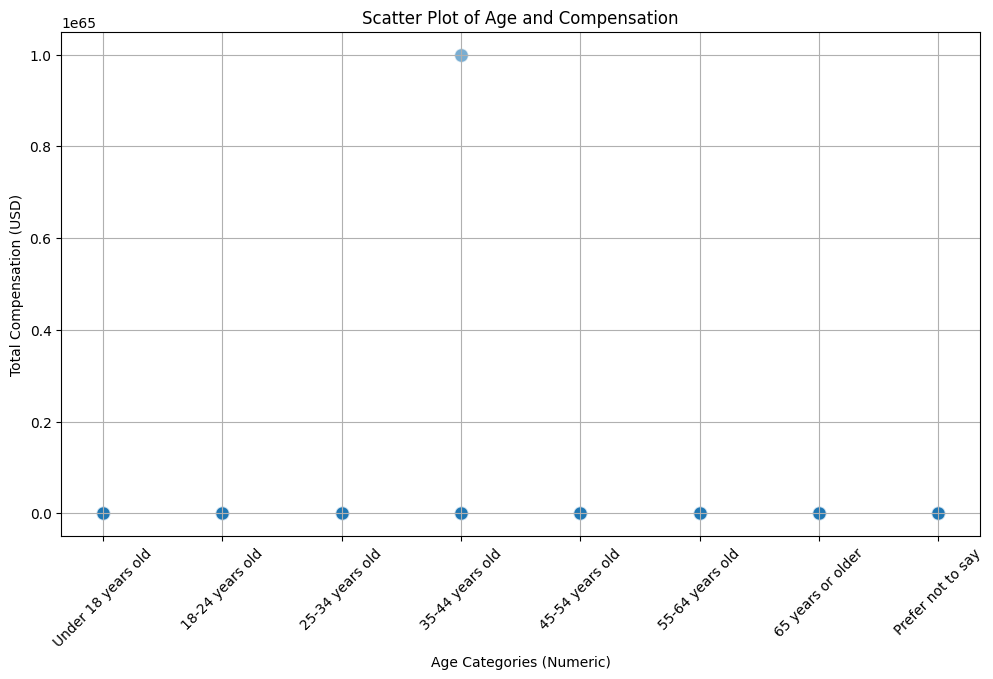

In [167]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Create the scatter plot for 'AgeNumeric' and 'CompTotal'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeNumeric'], df_cleaned['CompTotal'], alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.ylabel('Total Compensation (USD)')
plt.title('Scatter Plot of Age and Compensation')
plt.grid(True)
plt.tight_layout()

# Customizing the x-axis with category labels
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.show()


<ipython-input-168-71c05358858f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


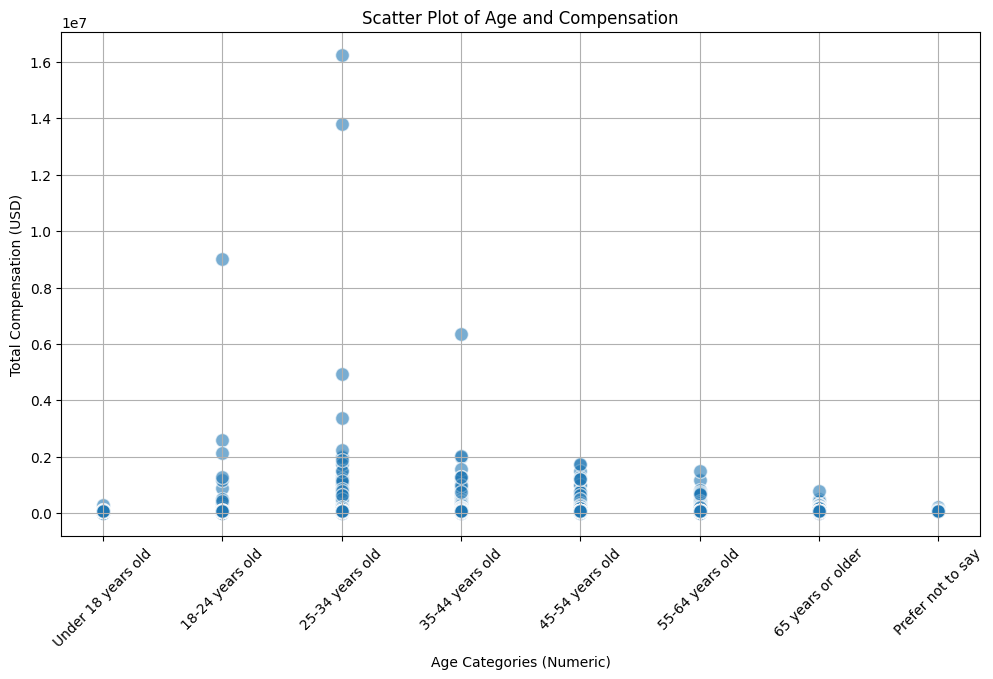

In [168]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Create the scatter plot for 'AgeNumeric' and 'CompTotal'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeNumeric'], df_cleaned['ConvertedCompYearly'], alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.ylabel('Total Compensation (USD)')
plt.title('Scatter Plot of Age and Compensation')
plt.grid(True)
plt.tight_layout()

# Customizing the x-axis with category labels
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


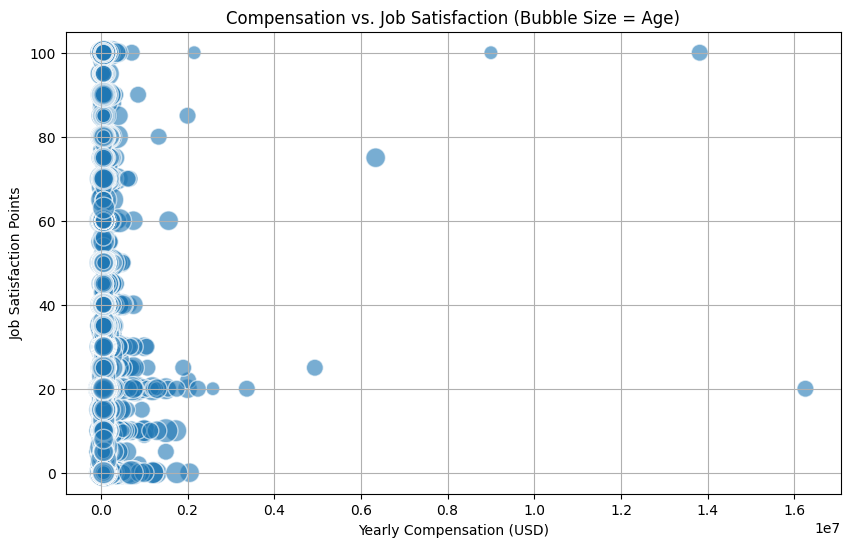

In [169]:
# Assuming 'AgeNumeric' is already created and in df_cleaned

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['ConvertedCompYearly'], df_cleaned['JobSatPoints_6'],
            s=df_cleaned['AgeNumeric'] * 50, alpha=0.6, edgecolors='w')

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.grid(True)
plt.show()

<ipython-input-170-5c0ef2e5c45e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


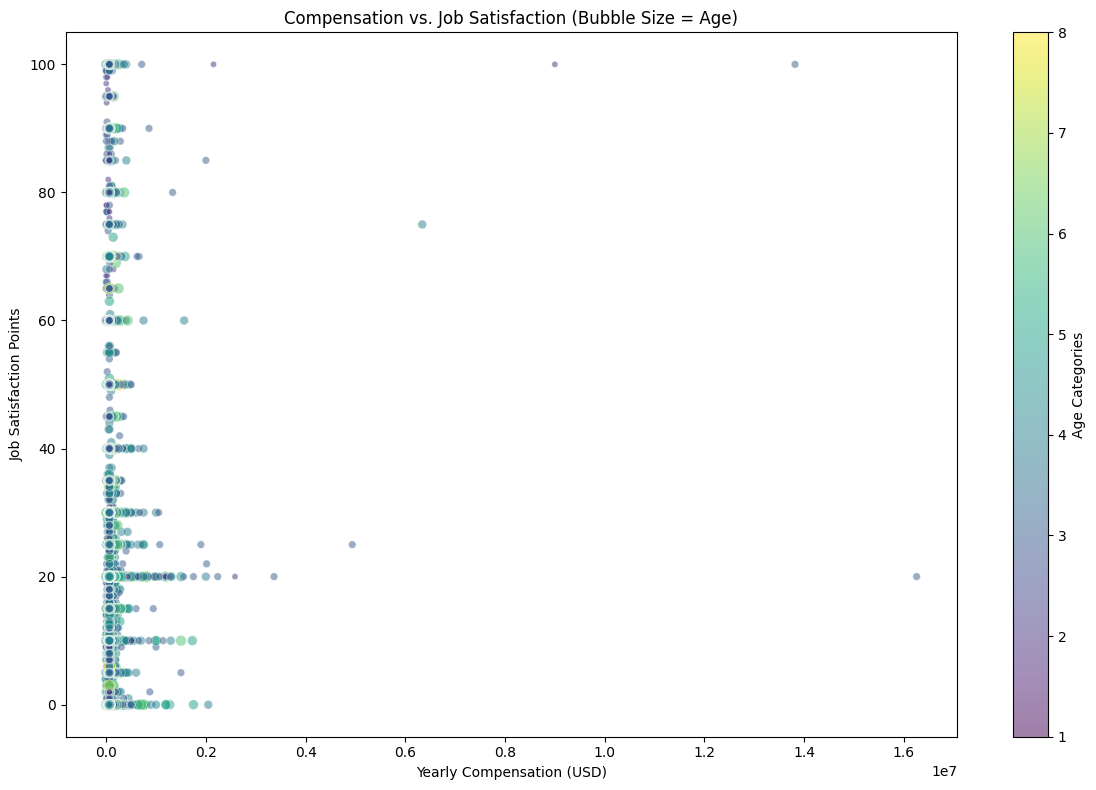

In [170]:

# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Create the bubble plot
plt.figure(figsize=(12, 8))
bubble = plt.scatter(df_cleaned['ConvertedCompYearly'], df_cleaned['JobSatPoints_6'],
                     s=df_cleaned['AgeNumeric']*10, alpha=0.5,
                     c=df_cleaned['AgeNumeric'], cmap='viridis', edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')

# Add color bar to indicate Age
cbar = plt.colorbar(bubble)
cbar.set_label('Age Categories')

# Show the plot
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



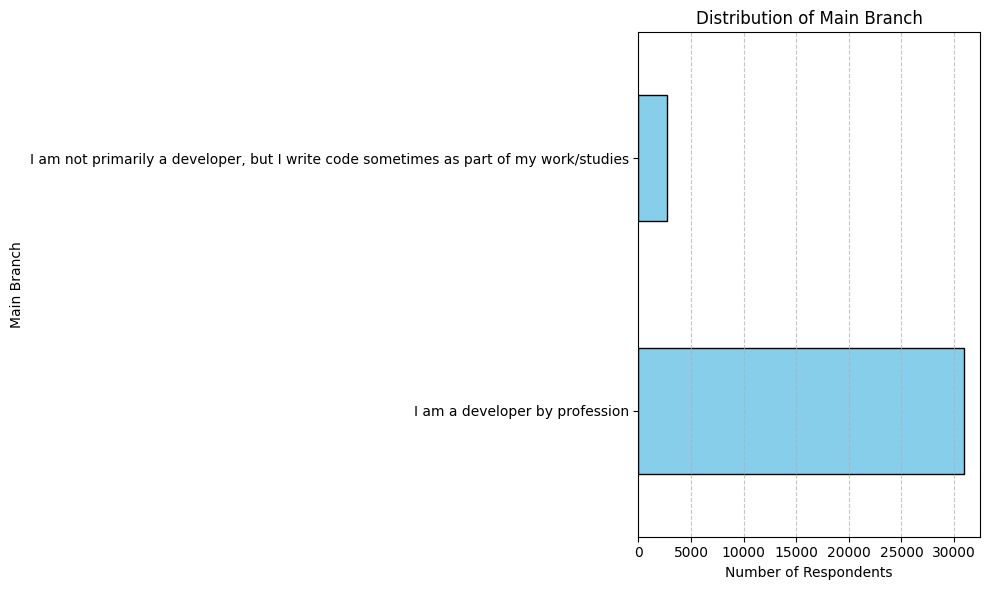

In [171]:
# Calculate the value counts for 'MainBranch'
main_branch_counts = df_cleaned['MainBranch'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

MainBranch
I am a developer by profession                                                           30926
I am not primarily a developer, but I write code sometimes as part of my work/studies     2691
Name: count, dtype: int64


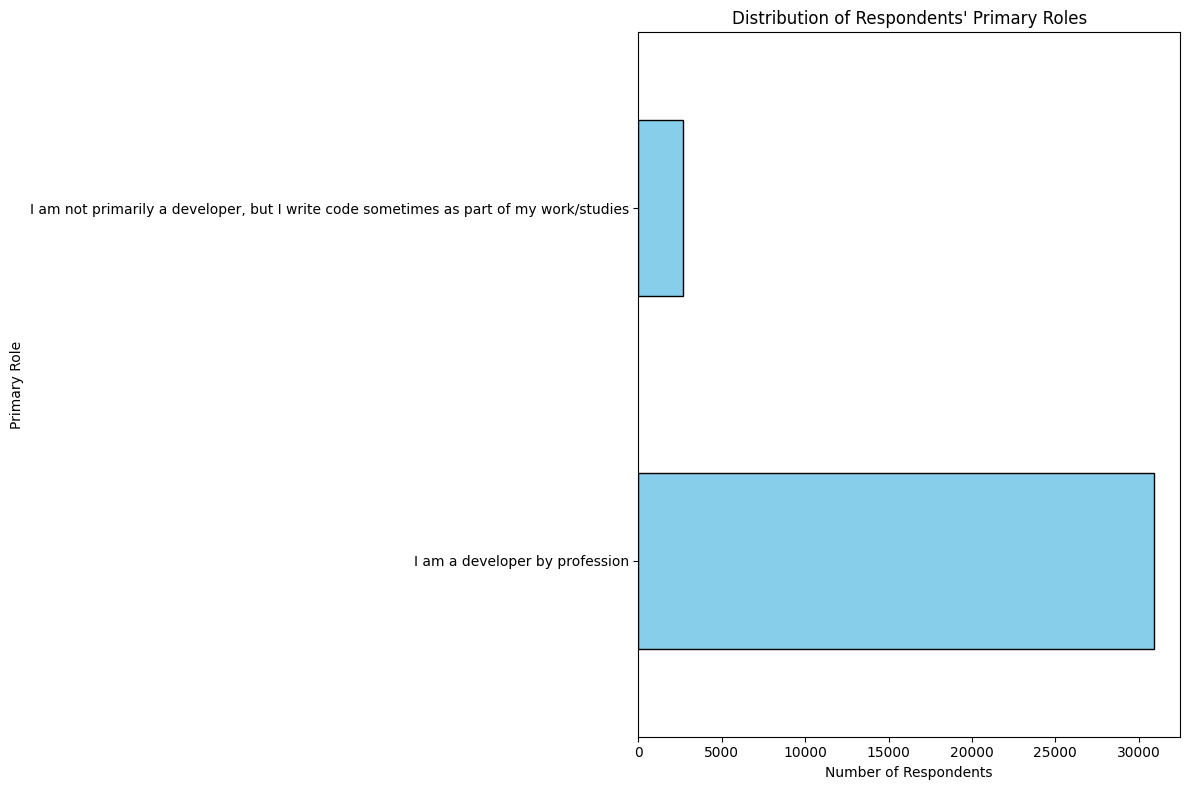

In [172]:
# Calculate the count of each category in the 'MainBranch' column
main_branch_counts = df_cleaned['MainBranch'].value_counts()

# Display the counts for each MainBranch category
print(main_branch_counts)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.title('Distribution of Respondents\' Primary Roles')

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



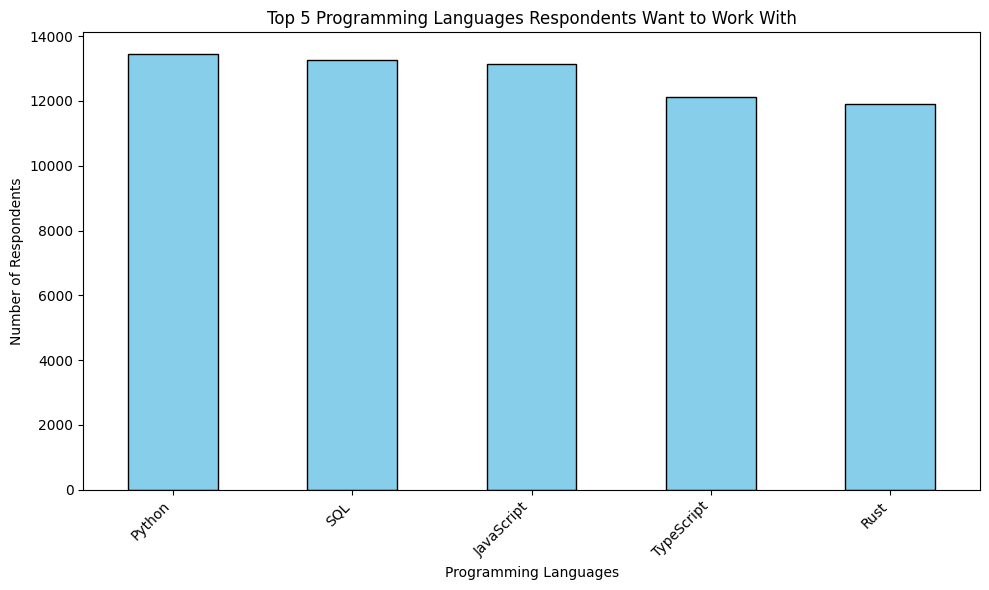

In [173]:
# Split the 'LanguageWantToWorkWith' column and explode it
languages_wanted = df_cleaned['LanguageWantToWorkWith'].str.split(';').explode()

# Count the occurrences of each language
language_counts = languages_wanted.value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

LanguageWantToWorkWith
Python                     13446
SQL                        13254
JavaScript                 13149
TypeScript                 12123
Rust                       11892
HTML/CSS                   11403
Go                          8176
Bash/Shell (all shells)     7973
C#                          7506
Java                        5479
C++                         4854
Kotlin                      4087
C                           3463
PHP                         2969
PowerShell                  2447
Swift                       2119
Zig                         1884
Dart                        1814
Elixir                      1785
Ruby                        1611
Lua                         1547
Scala                       1081
Assembly                    1074
Haskell                     1047
R                           1031
Clojure                      800
F#                           788
GDScript                     743
Erlang                       635
Lisp                

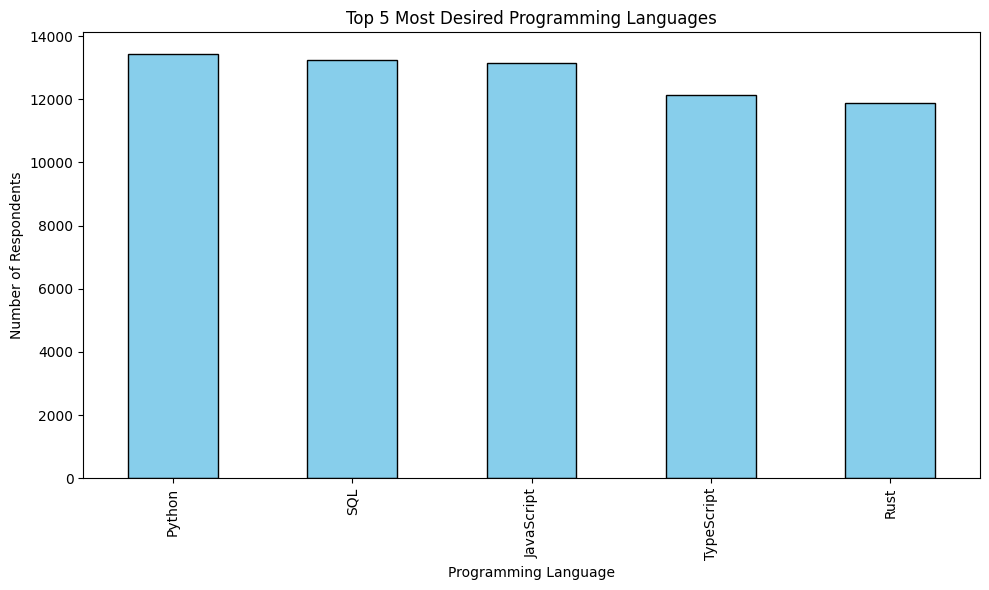

In [174]:
# Split the 'LanguageWantToWorkWith' column values and create a new DataFrame
languages = df_cleaned['LanguageWantToWorkWith'].str.split(';').explode()

# Count the frequency of each language
language_counts = languages.value_counts()

# Display the counts for each language
print(language_counts)

# Select the top 5 most desired languages
top_5_languages = language_counts.head(5)

# Display the top 5 languages
print(top_5_languages)

# Create the vertical bar chart for the top 5 languages
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Programming Languages')

# Show the plot
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


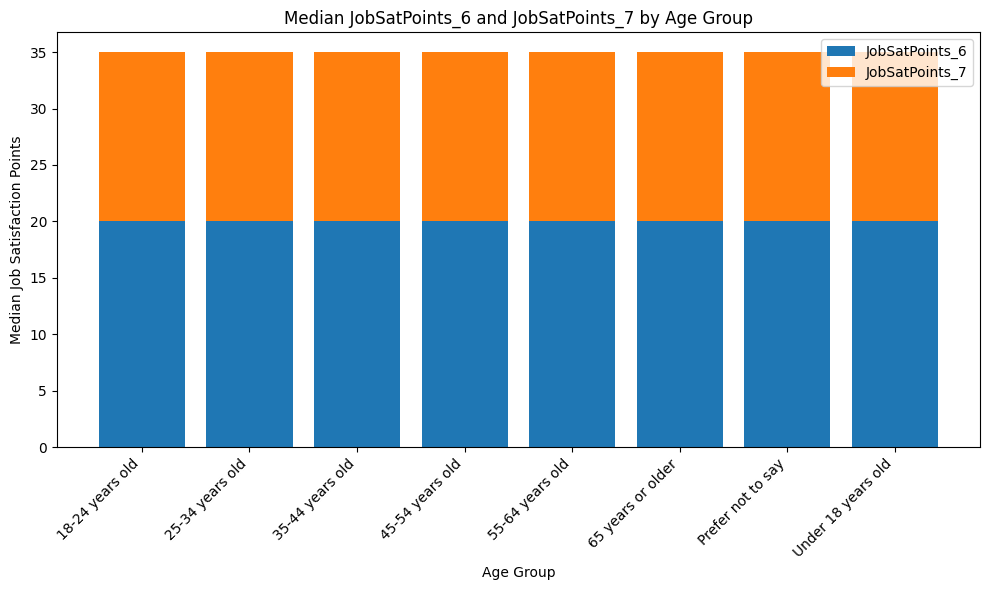

In [175]:
# Group data by age and calculate the median of JobSatPoints_6 and JobSatPoints_7
age_job_sat = df_cleaned.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_7'], bottom=age_job_sat['JobSatPoints_6'], label='JobSatPoints_7')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-176-1be076ceb7bd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


   AgeNumeric  JobSatPoints_6  JobSatPoints_7
0           1            20.0            15.0
1           2            20.0            15.0
2           3            20.0            15.0
3           4            20.0            15.0
4           5            20.0            15.0
5           6            20.0            15.0
6           7            20.0            15.0
7           8            20.0            15.0


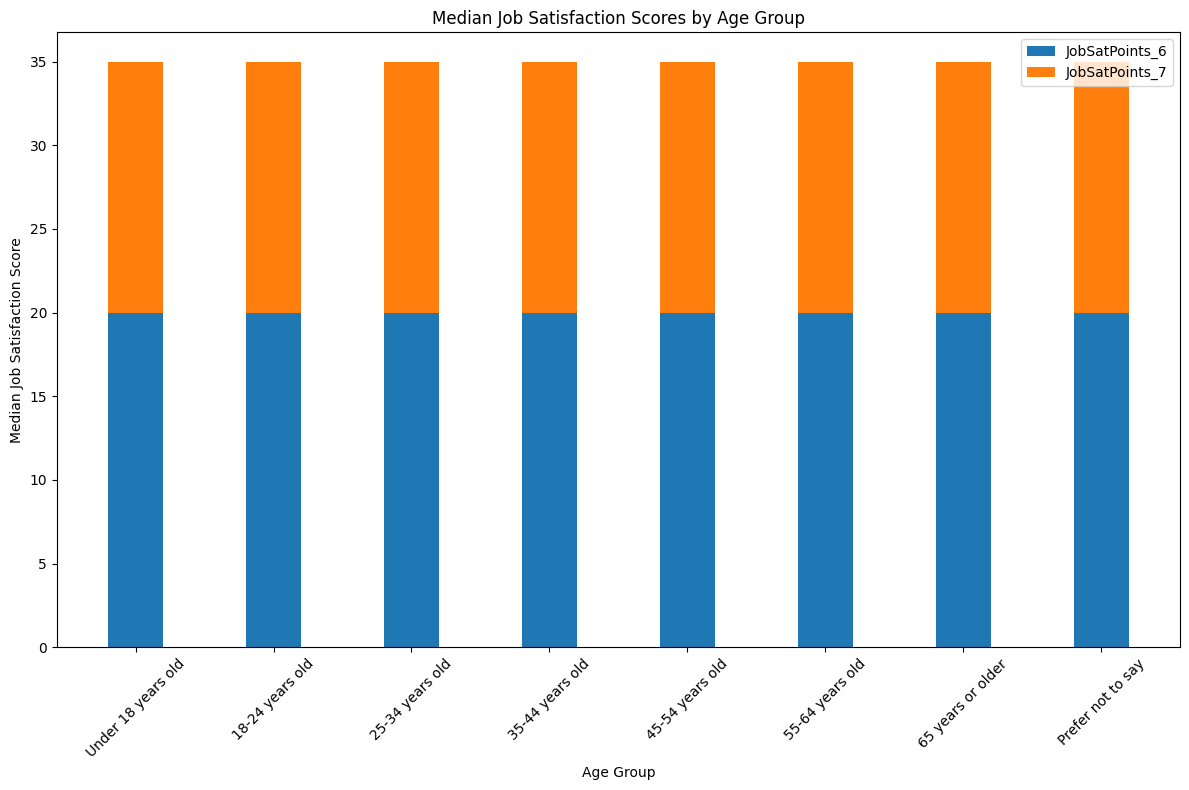

In [176]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Group by 'AgeNumeric' and calculate the median for 'JobSatPoints_6' and 'JobSatPoints_7'
median_job_satisfaction = df_cleaned.groupby('AgeNumeric')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Display the median job satisfaction scores
print(median_job_satisfaction)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the median job satisfaction scores
bar_width = 0.4
p1 = ax.bar(median_job_satisfaction['AgeNumeric'], median_job_satisfaction['JobSatPoints_6'], bar_width, label='JobSatPoints_6')
p2 = ax.bar(median_job_satisfaction['AgeNumeric'], median_job_satisfaction['JobSatPoints_7'], bar_width, bottom=median_job_satisfaction['JobSatPoints_6'], label='JobSatPoints_7')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Job Satisfaction Score')
ax.set_title('Median Job Satisfaction Scores by Age Group')
ax.set_xticks(median_job_satisfaction['AgeNumeric'])
ax.set_xticklabels(list(age_mapping.keys()), rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



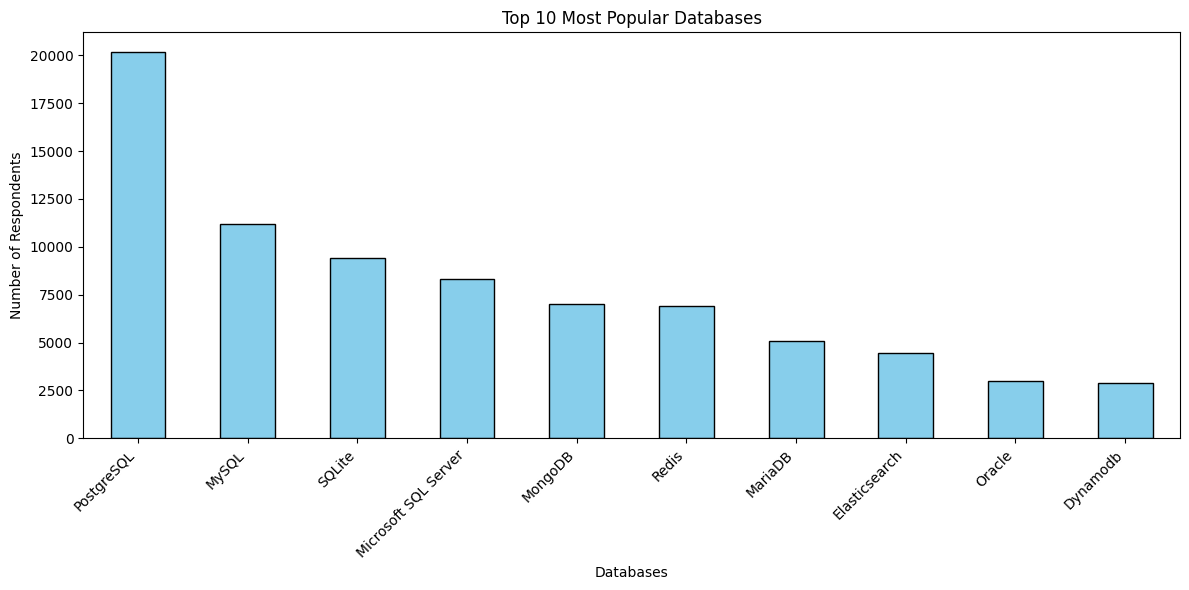

In [177]:
# Split the 'DatabaseHaveWorkedWith' column and explode it
databases = df_cleaned['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Get the top 10 databases
top_10_databases = database_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_10_databases.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Most Popular Databases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

DatabaseHaveWorkedWith
PostgreSQL                    20193
MySQL                         11205
SQLite                         9440
Microsoft SQL Server           8337
MongoDB                        6993
Redis                          6906
MariaDB                        5086
Elasticsearch                  4433
Oracle                         3000
Dynamodb                       2904
BigQuery                       1614
Cloud Firestore                1468
Firebase Realtime Database     1462
H2                             1227
Cosmos DB                      1212
Supabase                       1070
Microsoft Access                997
Snowflake                       954
InfluxDB                        844
Cassandra                       752
Databricks SQL                  652
Clickhouse                      567
Neo4J                           552
IBM DB2                         539
Solr                            481
DuckDB                          447
Couch DB                        310
Fireb

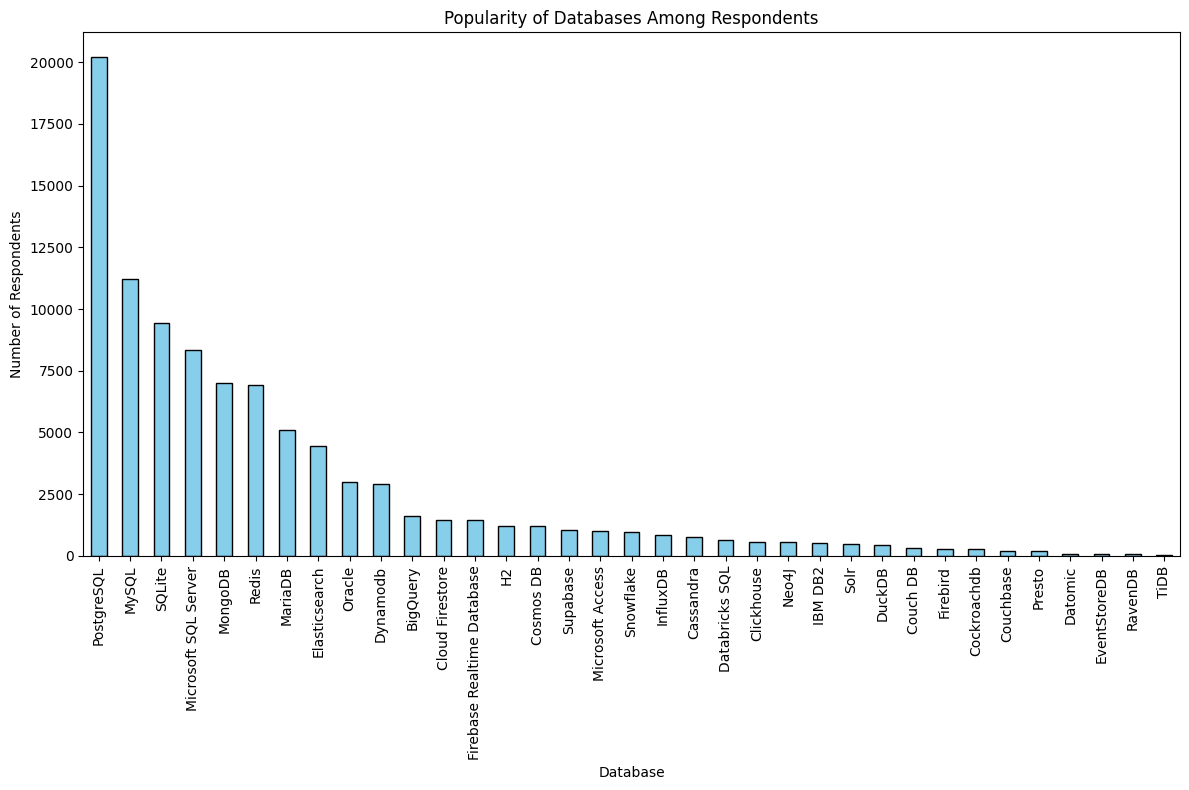

In [178]:
# Split the 'DatabaseHaveWorkedWith' column values and create a new DataFrame
databases = df_cleaned['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each database
database_counts = databases.value_counts()

# Display the counts for each database
print(database_counts)

# Create the bar chart for database popularity
plt.figure(figsize=(12, 8))
database_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Popularity of Databases Among Respondents')

# Show the plot
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



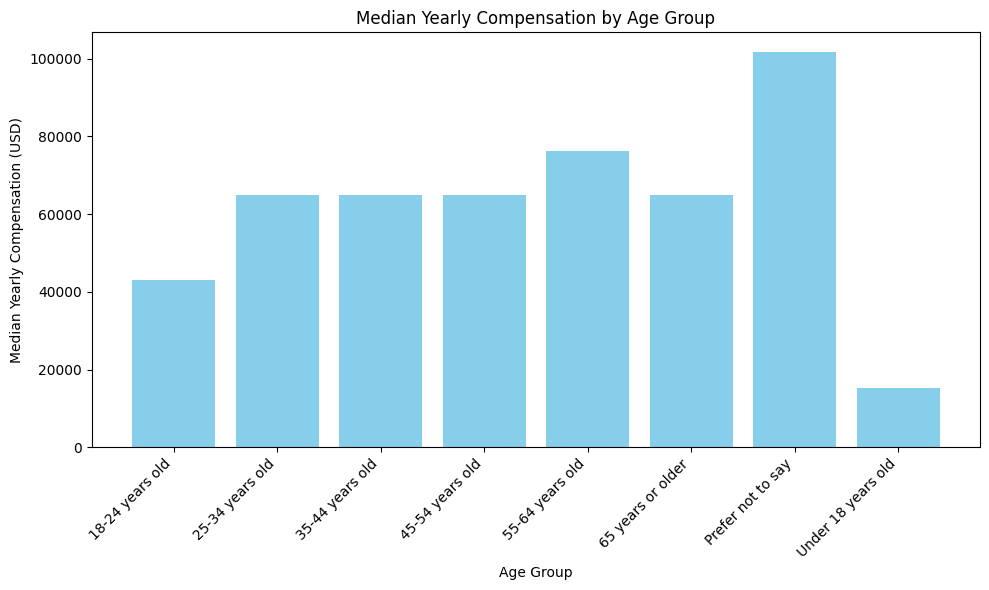

In [179]:
# Group data by age and calculate the median ConvertedCompYearly
age_compensation = df_cleaned.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_compensation['Age'], age_compensation['ConvertedCompYearly'], color='skyblue')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-180-87205f22b9a4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


   AgeNumeric  CompTotal
0           1    17000.0
1           2    63000.0
2           3   101500.0
3           4   120000.0
4           5   130000.0
5           6   135000.0
6           7   129642.5
7           8   135000.0


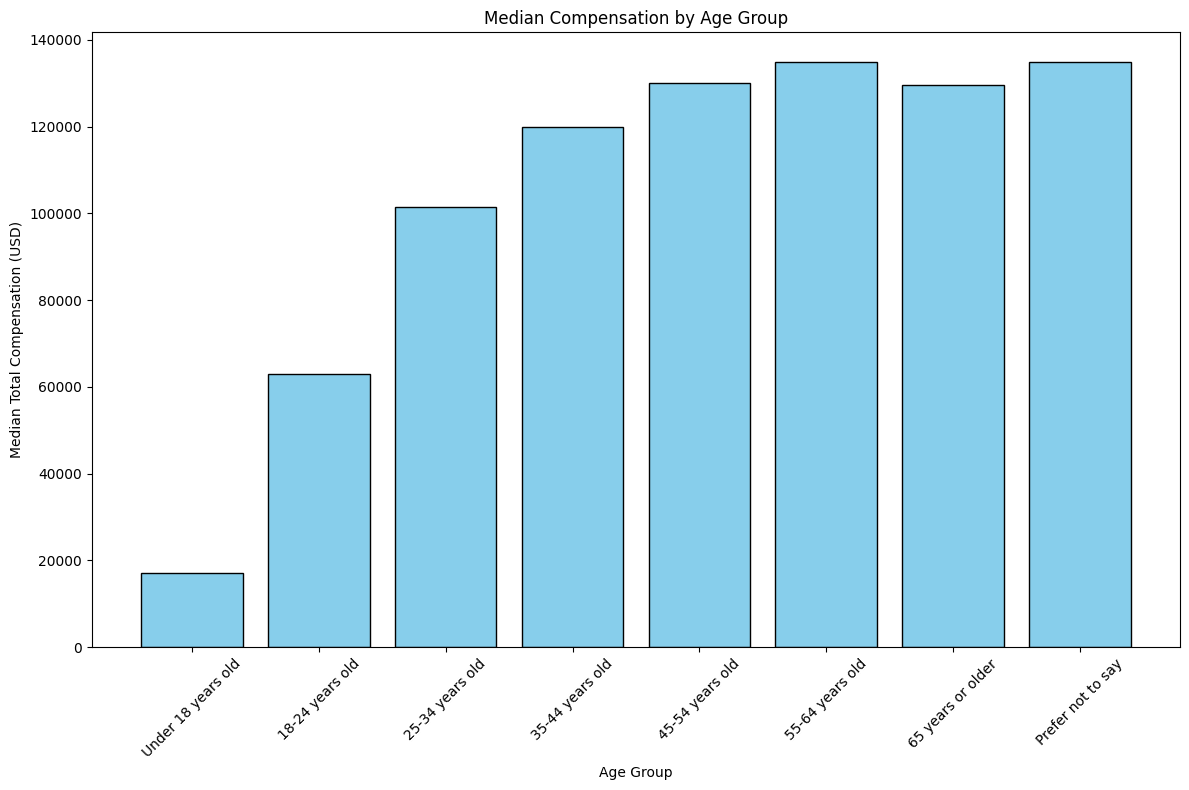

In [180]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Group by 'AgeNumeric' and calculate the median for 'CompTotal'
median_compensation_by_age = df_cleaned.groupby('AgeNumeric')['CompTotal'].median().reset_index()

# Display the median compensation by age group
print(median_compensation_by_age)

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(median_compensation_by_age['AgeNumeric'], median_compensation_by_age['CompTotal'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation (USD)')
plt.title('Median Compensation by Age Group')

# Customizing the x-axis with category labels
plt.xticks(ticks=median_compensation_by_age['AgeNumeric'], labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



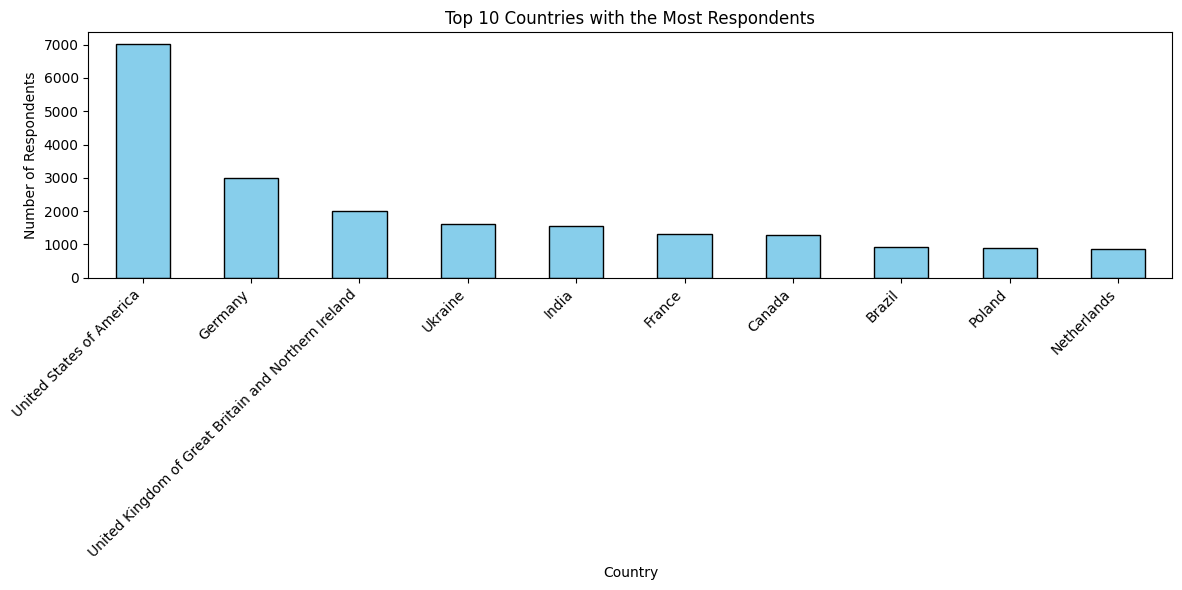

In [181]:
# Calculate the number of respondents for each country
country_counts = df_cleaned['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Countries with the Most Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Country
United States of America                                7018
Germany                                                 2999
United Kingdom of Great Britain and Northern Ireland    2000
Ukraine                                                 1600
India                                                   1540
                                                        ... 
Libyan Arab Jamahiriya                                     1
Central African Republic                                   1
Democratic People's Republic of Korea                      1
Gabon                                                      1
Monaco                                                     1
Name: count, Length: 170, dtype: int64
Country
United States of America                                7018
Germany                                                 2999
United Kingdom of Great Britain and Northern Ireland    2000
Ukraine                                                 1600
India                         

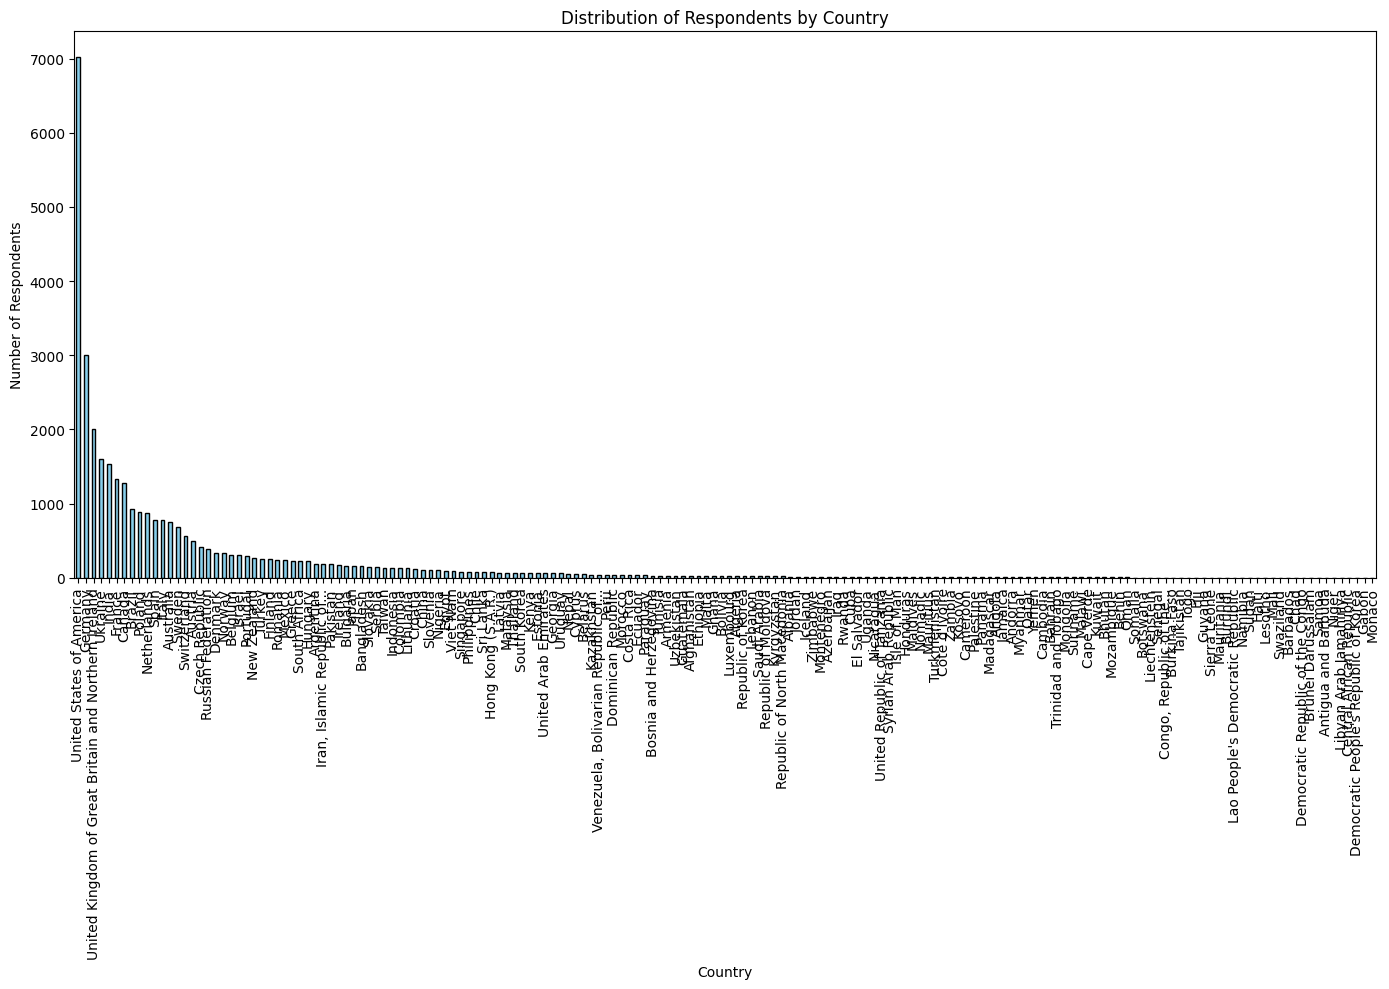

In [182]:
# Calculate the count of respondents for each country
country_counts = df_cleaned['Country'].value_counts()

# Display the counts for each country
print(country_counts)

# Get the top 10 countries with the most respondents
top_10_countries = country_counts.head(10)

# Display the top 10 countries
print(top_10_countries)

# Create the bar chart for respondent count by country
plt.figure(figsize=(14, 10))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Country')

# Show the plot
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.


###Current Technology Usage Tab
1. Top 10 Languages Respondents Have Worked With:

  * Dataset: LanguageHaveWorkedWith

  * Steps:

    a. Split and explode the LanguageHaveWorkedWith column to get individual languages.

    b. Count the frequency of each language.

    c. Display the top 10 languages using a bar chart.

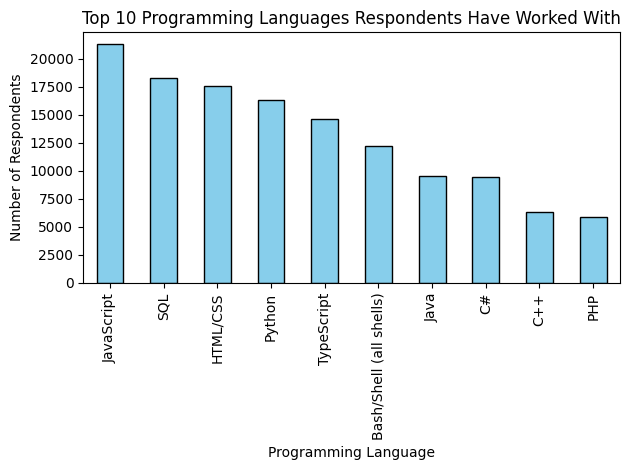

In [183]:
# Split and explode 'LanguageHaveWorkedWith'
languages = df_cleaned['LanguageHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each language
language_counts = languages.value_counts().head(10)

# Visualize the top 10 languages
language_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Programming Languages Respondents Have Worked With')
plt.tight_layout()
plt.show()

2. Top 10 Databases Respondents Have Used:

  * Dataset: DatabaseHaveWorkedWith

  * Steps:

    a. Split and explode the DatabaseHaveWorkedWith column to get individual databases.

    b. Count the frequency of each database.

    c. Display the top 10 databases using a bar chart.

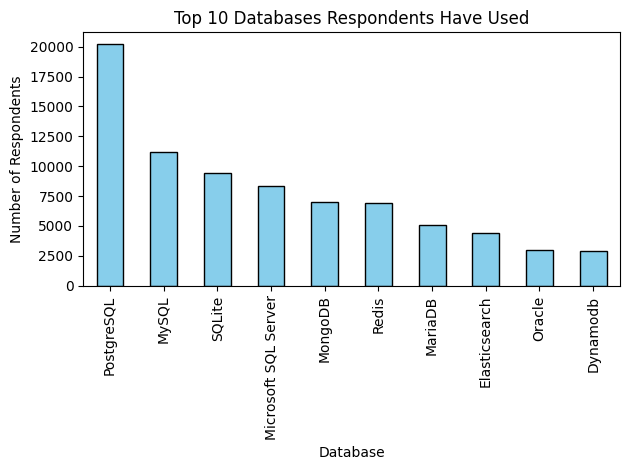

In [184]:
# Split and explode 'DatabaseHaveWorkedWith'
databases = df_cleaned['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each database
database_counts = databases.value_counts().head(10)

# Visualize the top 10 databases
database_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Databases Respondents Have Used')
plt.tight_layout()
plt.show()

3. Platforms Respondents Have Worked With:

  * Dataset: PlatformHaveWorkedWith

  * Steps:

    a. Split and explode the PlatformHaveWorkedWith column to get individual platforms.

    b. Count the frequency of each platform.

    c. Display the platforms using a bar chart.

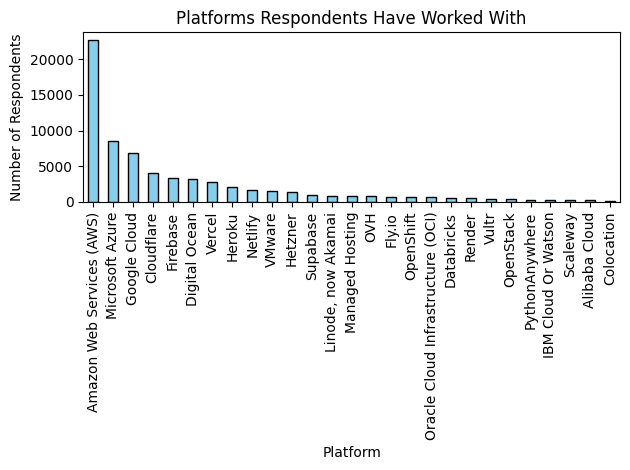

In [185]:
# Split and explode 'PlatformHaveWorkedWith'
platforms = df_cleaned['PlatformHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each platform
platform_counts = platforms.value_counts()

# Visualize the platforms
platform_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Platform')
plt.ylabel('Number of Respondents')
plt.title('Platforms Respondents Have Worked With')
plt.tight_layout()
plt.show()

4. Top 10 Web Frameworks Respondents Have Used:

  * Dataset: WebframeHaveWorkedWith

  * Steps:

    a. Split and explode the WebframeHaveWorkedWith column to get individual frameworks.

    b. Count the frequency of each framework.

    c. Display the top 10 frameworks using a bar chart.

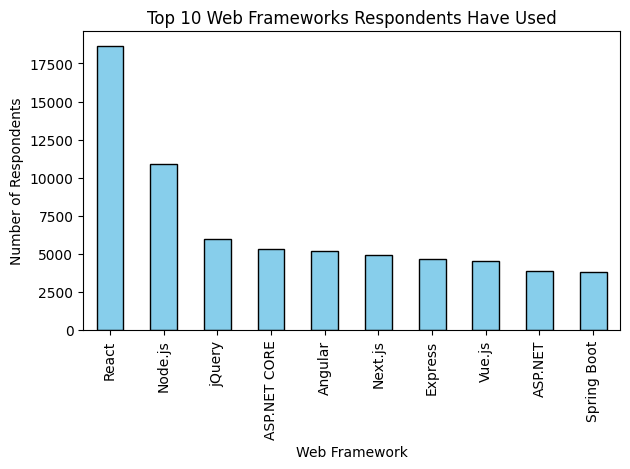

In [186]:
# Split and explode 'WebframeHaveWorkedWith'
webframes = df_cleaned['WebframeHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each framework
webframe_counts = webframes.value_counts().head(10)

# Visualize the top 10 web frameworks
webframe_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Web Frameworks Respondents Have Used')
plt.tight_layout()
plt.show()

## Future Technology Trends Tab
  1. Top 10 Languages Desired for Next Year:

    * Dataset: LanguageWantToWorkWith

    * Steps: Same as Top 10 Languages Respondents Have Worked With.

  2. Top 10 Databases Desired for Next Year:

    * Dataset: DatabaseWantToWorkWith

    * Steps: Same as Top 10 Databases Respondents Have Used.

  3. Desired Platforms for Next Year:

    * Dataset: PlatformWantToWorkWith

    * Steps: Same as Platforms Respondents Have Worked With.

4. Top 10 Web Frameworks Desired for Next Year:

  * Dataset: WebframeWantToWorkWith

  * Steps: Same as Top 10 Web Frameworks Respondents Have Used.

## Demographics Tab
1. Countries:

  * Dataset: Country

  * Steps:

    a. Count the number of respondents from each country.

    b. Display the counts using a bar chart.

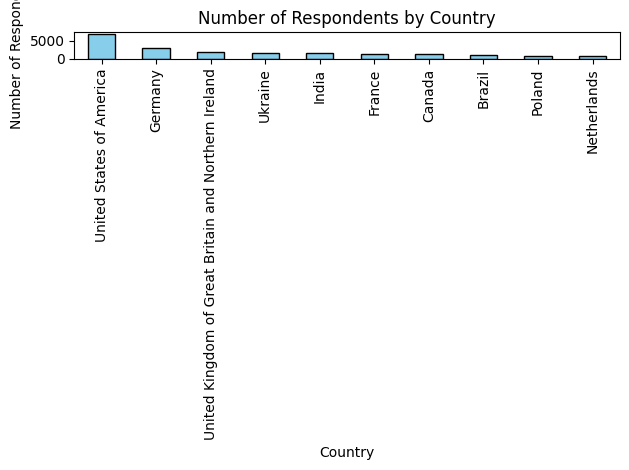

In [188]:
# Count the number of respondents from each country
country_counts = df_cleaned['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Visualize the country distribution
top_10_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Country')
plt.tight_layout()
plt.show()

2. Age Groups:

  * Dataset: Age

  * Steps:

    a. Map age categories to numerical values.

    b. Count the number of respondents in each age group.

    c. Display the counts using a bar chart.

<ipython-input-189-f5b8a8418fe4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)


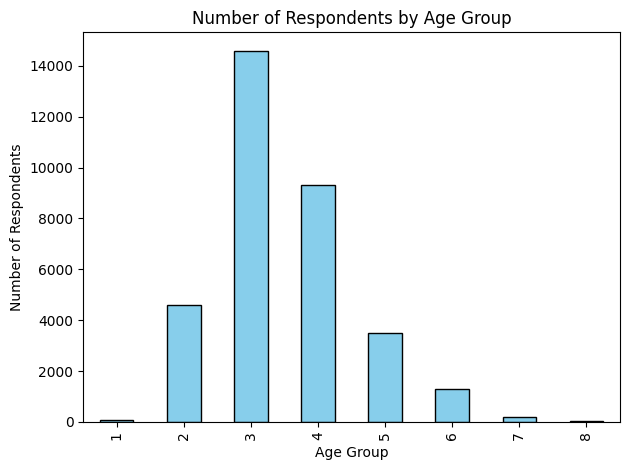

In [189]:
# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Count the number of respondents in each age group
age_counts = df_cleaned['AgeNumeric'].value_counts().sort_index()

# Visualize the age group distribution
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Age Group')
plt.tight_layout()
plt.show()

3. Education Level:

  * Dataset: EdLevel

  * Steps:

    a. Count the number of respondents in each education level.

    b. Display the counts using a bar chart.

<ipython-input-190-e82478a8865c>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

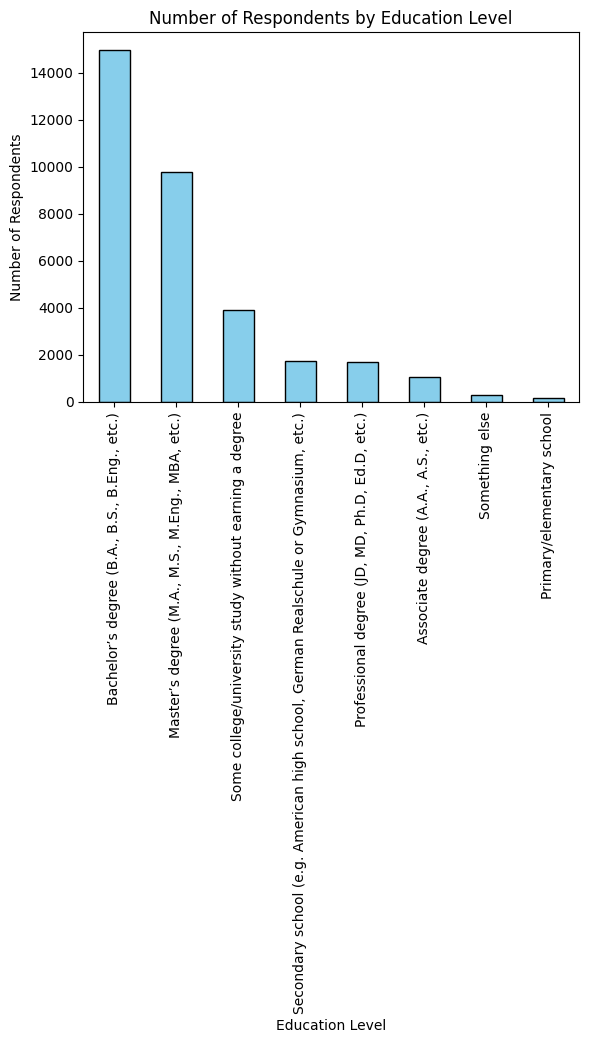

In [190]:
# Count the number of respondents in each education level
edlevel_counts = df_cleaned['EdLevel'].value_counts()

# Visualize the education level distribution
edlevel_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Education Level')
plt.tight_layout()
plt.show